
# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Here I have selected the TMDB dataset,that contains data about the movies contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> So, the dataset contains 21 columns.We would look into the dataset and try to fin if there are any null values.

### General Properties

In [78]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
imdb_data = pd.read_csv('tmdb-movies.csv')
imdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Data Type associated with each column

In [79]:
imdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning 

The id and imdb_id values in every row. So first lets check the number of unique rows in both these columns.

In [80]:
imdb_data[['id','imdb_id']].nunique()

id         10865
imdb_id    10855
dtype: int64

Lets check if there's any null value in those columns and from it looks like there is.So we have to drop them.

In [81]:
imdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [82]:
imdb_data.dropna(subset=['imdb_id'],inplace=True)

Lets check if if has been fixed.

In [83]:
imdb_data.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7922
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [84]:
imdb_data[['id','imdb_id']].nunique()

id         10855
imdb_id    10855
dtype: int64

Next we have to check for duplicate row and remove them if there is any.

In [85]:
sum(imdb_data.duplicated())

1

In [86]:
imdb_data.drop_duplicates(inplace=True)

In [87]:
sum(imdb_data.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### 1. In which Month does the most movies get released and by how much the number of movies released increases over the year?

>Here, we would be looking the month and year againt the number of movies

In [88]:
def get_month(date):
    date = date.split("/")
    month_list.append(date[0])
    print(month_list)

Since ,the release_date column contain the date and year also we have to extract the month from it. 

In [89]:
month_list = []
imdb_data['release_date'].apply(get_month)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
10836    None
10837    None
10838    None
10839    None
10840    None
10841    None
10842    None
10843    None
10844    None
10845    None
10846    None
10847    None
10848    None
10849    None
10850    None
10851    None
10852    None
10853    None
10854    None
10855    None
10856    None
10857    None
10858    None
10859    None
10860    None
10861    None
10862    None
10863    None
10864    None
10865    None
Name: release_date, Length: 10855, dtype: object

Next, we add these data to a dict to plot them onto the graph.

In [90]:
def add_to_dict(list_values):
    dict_list = dict()
    for key in list_values:
        if int(key) in dict_list:
            dict_list[int(key)] += 1
        else:
            dict_list[int(key)] = 1
    return dict_list

In [91]:
dict_month = add_to_dict(month_list)
dict_year = add_to_dict(imdb_data['release_year'])

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Apr'),
 Text(0,0,'Jun'),
 Text(0,0,'Aug'),
 Text(0,0,'Oct'),
 Text(0,0,'Dec')]

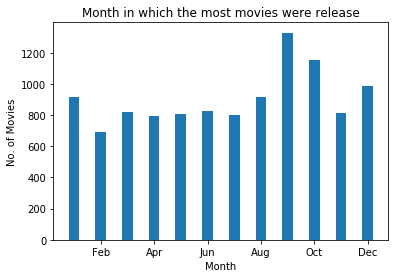

In [92]:
figs, ax =plt.subplots()
ax.bar(dict_month.keys(), dict_month.values(),0.4)
ax.set_xlabel('Month')
ax.set_ylabel('No. of Movies')
ax.set_title('Month in which the most movies were release')
ax.set_xticklabels(['Jan','Feb','Apr','Jun','Aug','Oct','Dec'])

Text(0.5,1,'Number of Movies Released over the years')

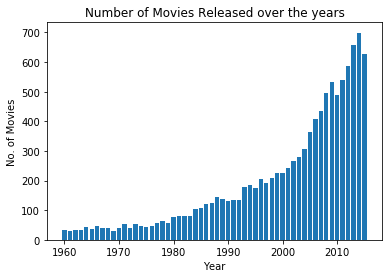

In [93]:
fig , ax = plt.subplots()
ax.bar(dict_year.keys(),dict_year.values())
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
ax.set_title('Number of Movies Released over the years')

From the above graph it is clear that more films are being released in the month september and october, even more than the month december, which seems to be a more logical month to choose to release a movie since it the holidays around the world.But since we haven't analyzed any other factors it still unclear why that 2 month have seen more films being relased.Analyzing the year there is no huge jump but there is a steady increase in the number of movies being released every year.

### 2.Does higher rating means more revenue?

>Here, we gonna check if does higher rating means better profits?
>
>To analyze this data,we are gonna split the rating into 10 groups(Rating 0-0.9 fall in group 0 , rating 1-1.9 fall into group 1 and so on...) and we are gonna calculate the difference in revenue_adj and budget_adj.Then the data is plotted using a scatter plot.

In [94]:
rev = imdb_data['revenue_adj'].sub(imdb_data['budget_adj'],level='imdb_id')
imdb_data['profit_or_loss'] = rev

In [95]:
scaled_values = abs(rev / rev.std())

Text(0.5,1,'Profit or Loss according to the average rating')

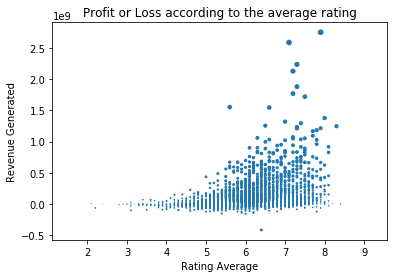

In [96]:
figs,ax = plt.subplots()
ax.scatter(imdb_data['vote_average'],imdb_data['profit_or_loss'],s=scaled_values)
ax.set_xlabel('Rating Average')
ax.set_ylabel('Revenue Generated')
ax.set_title('Profit or Loss according to the average rating')

So generally it true but there are cases where a rating between 6-7 made a loss where there are films that made better revenue than that film. And we can also see that the highest profit is made by the film that has higher rating but not the highest rating.

>Next Graph shows the number of movies that made profit or loss according to the rating.

In [97]:
len(imdb_data)
rating_profit_dict={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
rating_loss_dict={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
for row in imdb_data.iterrows():
    if row[1]['profit_or_loss'] > 0:
        rating_profit_dict[int(row[1]['vote_average'])] += 1
    elif row[1]['profit_or_loss'] < 0:
        rating_loss_dict[int(row[1]['vote_average'])] += 1

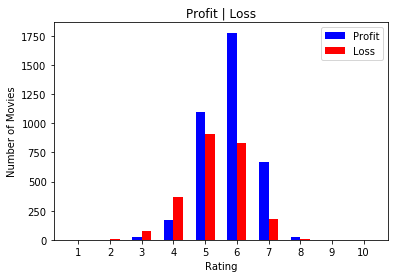

In [98]:
x=rating_profit_dict
y=rating_loss_dict
index = np.arange(10)
figs ,ax = plt.subplots()
bar_width = 0.3
rects1 = ax.bar(index, x.values(), bar_width,color='b',label='Profit')
rects2 = ax.bar(index + bar_width, y.values(), bar_width,color='r',label='Loss')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Profit | Loss')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3','4','5','6','7','8','9','10'))
ax.legend()

The graph does not conside the cases where there is no profit or loss.And its intresting to see that the films with rating below 5 bears loss than gaining profits.

<a id='conclusions'></a>
## Conclusions

From the above experiments we got some intresting results.There seems to be particular month where films are being released in more number.But in this case we dont known why it that,is it because its summer time in a particular region or whether it is the holiday seasons? We havent analyzed the data with respect to region it is relased or made.
From the second question we can defentity infer that more films fall in rating 6 - 7.We also saw that rating below 5 doest do well in terms of profit but it might be because it didn't released to more theatres than the other films or is it because the budget was way too high or is it because the film was actually bad.
##### Limitations of Dataset
The Dataset could use in which region these films were released such as if it was worldwide or just a particular country.It could also use information such as what language the film is.
